# Machine Learning Model: Feature Selection, Training, and Evaluation

### Step 1: Import Required Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2: Load Dataset from Seaborn

In [28]:
df = sns.load_dataset("titanic")

### Step 3: Exploratory Data Analysis (EDA)

In [5]:
print("Dataset Sample:")
print(df.head())

Dataset Sample:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [6]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### Step 4: Data Preprocessing

#### Drop rows with missing target values (assumed target column: 'survived')

In [8]:
df = df.dropna(subset=['survived'])

#### Select features and target column

In [9]:
features = df.drop(columns=['survived'])  # Drop target column
target = df['survived']

#### Convert categorical features to numeric using one-hot encoding

In [29]:
features = pd.get_dummies(features, drop_first=True)

### Step 5: Split Data into Training and Testing Sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#### Ensure both train and test datasets have the same columns after encoding

In [31]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### Step 6: Scale Numeric Features

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 7: Train Model (Random Forest Classifier)

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 8: Make Predictions

In [34]:
y_pred = model.predict(X_test)

### Step 9: Evaluate Model Performance

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



### Step 10: Confusion Matrix Visualization

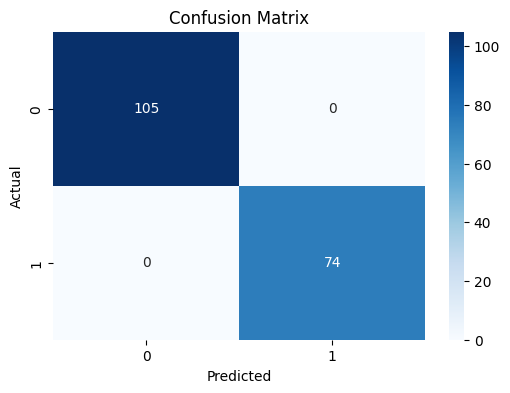


Machine Learning Model Training Complete!


In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nMachine Learning Model Training Complete!")